# (연구&교수님) EBT – ECG 자료 시각화

최규빈  
2024-07-30

In [1]:
library(devtools)
install_github("guebin/EBT",force=TRUE)
library(tidyverse)
library(ebt)

Loading required package: usethis


── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── R CMD build ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpuHgN5w/remotes90472302a4357/guebin-EBT-5d28259/DESCRIPTION’
─  preparing ‘ebt’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘ebt_0.1.0.tar.gz’
   


## A. signal

In [ ]:
library(wavelets)
data(ecg)
f<-as.vector(ecg)
t<-seq(0,11.37,length=2048)
fs<-180 
maxtau=180
len<-length(f)
ecg_mvmap <- mvmap(f,maxtau = maxtau)
save(ecg_mvmap, file = "ecg_mvmap_0730.RData")
load("ecg_mvmap_0730.RData")
v_map<-ecg_mvmap$vmap

In [194]:
# 필요 패키지 로드
library(phonTools)
library(fields)
library(viridis)

# 데이터 준비
data(ecg)
f <- as.vector(ecg)
fs <- 180  # 샘플링 주파수 180 Hz
n_samples <- length(f)
t_total <- n_samples / fs  # 전체 시간 길이 계산
t <- seq(0, t_total, length = n_samples)

# 스펙트로그램 계산
window_length <- 256  # 윈도우 길이를 256 샘플로 설정
spec_result <- spectrogram(f, fs = fs, windowlength = window_length, show = FALSE)
spectrogram_data <- spec_result$spectrogram
time_spec <- spec_result$time
freq_spec <- spec_result$frequency

# 그래프 영역을 2x1 배열로 설정
layout(matrix(c(1, 2), ncol = 1, byrow = TRUE))

# 첫 번째 그래프: ECG 신호의 선형 플롯
par(mar = c(4, 4, 2, 2))  # 아래, 왼쪽, 위, 오른쪽 마진 설정
plot(t, f, type = 'l', main = "ECG signal", xlab = "Time [s]", ylab = "Amplitude")

# 두 번째 그래프: 스펙트로그램 플롯
par(mar = c(4, 4, 2, 2))
image.plot(time_spec, freq_spec, t(spectrogram_data), 
           xlab = "Time (s)", ylab = "Frequency (Hz)", main = "Spectrogram",
           col = viridis(256, option = "magma"))

# 그래프 배열을 원래 상태로 되돌리기
par(mfrow = c(1, 1))

Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”

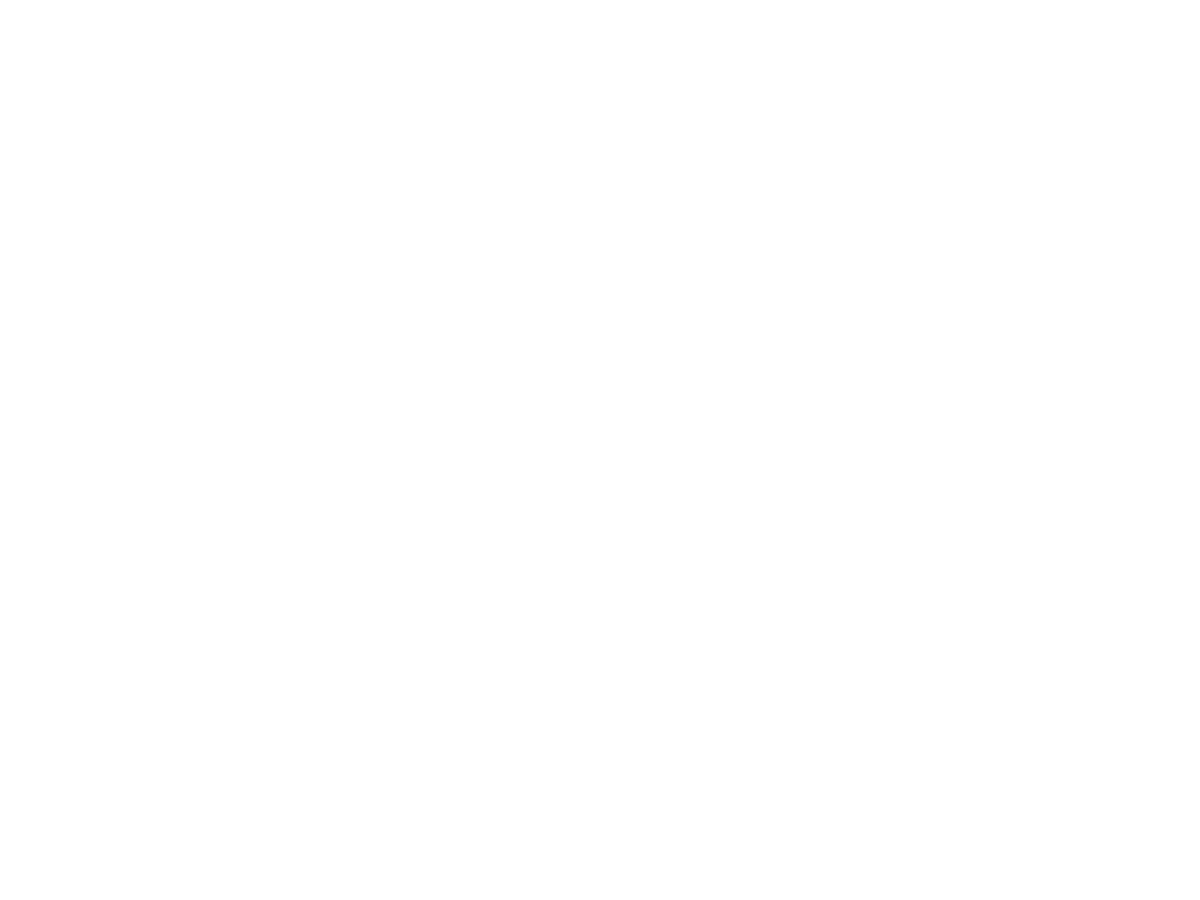

In [195]:
image.plot(time_spec, freq_spec, t(spectrogram_data), 
           xlab = "Time (s)", ylab = "Frequency (Hz)", main = "Spectrogram",
           col = viridis(256, option = "magma"))

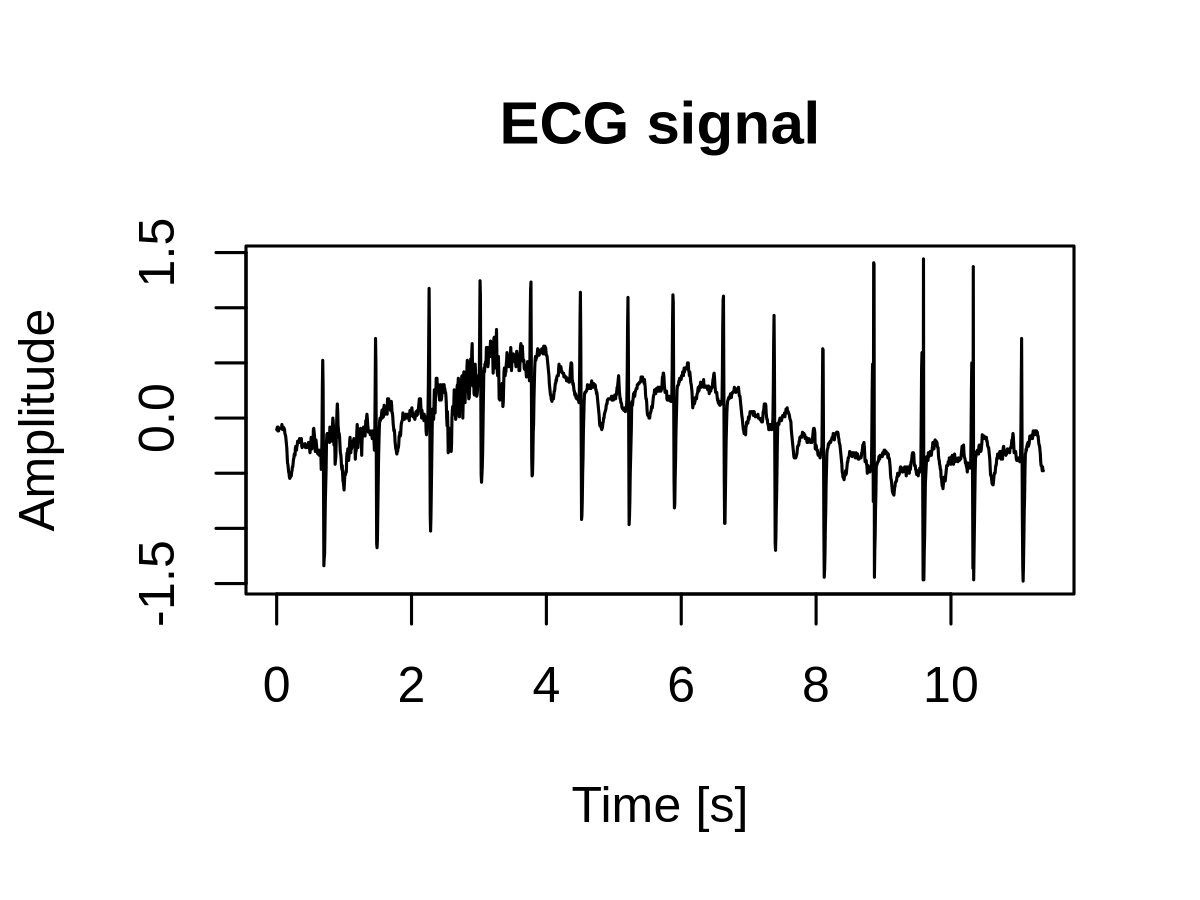

In [150]:
# 첫 번째 그래프: ECG 신호의 선형 플롯
plot(t, f, type = 'l', main = "ECG signal", xlab = "Time [s]", ylab = "Amplitude")

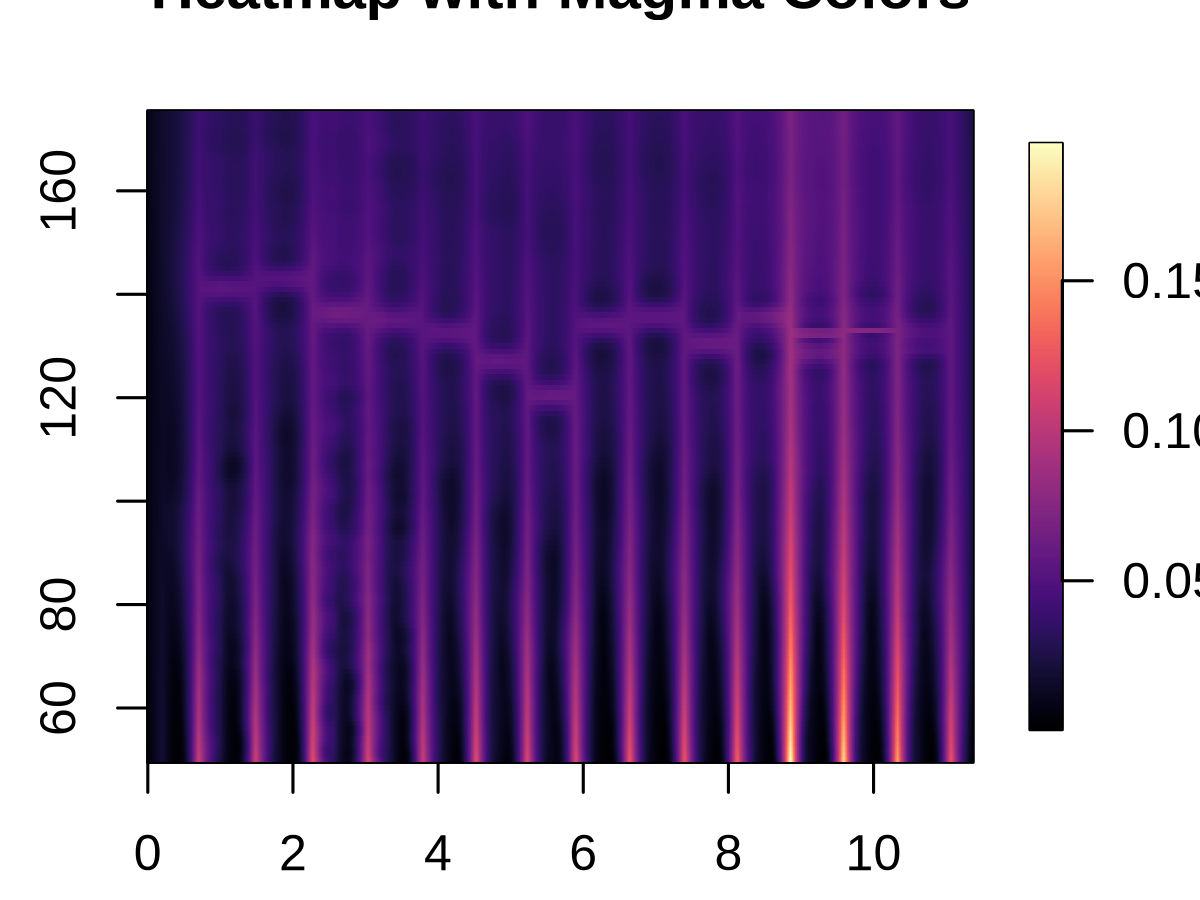

In [165]:
# 두 번째 그래프: 히트맵 플롯
image.plot(x = t, y = mintau:maxtau, z = v_map[1:len, 50:175],
           xlab = "Time (s)", ylab = "Scale", main = "Heatmap with Magma Colors",
           col = viridis(256, option = "magma"))

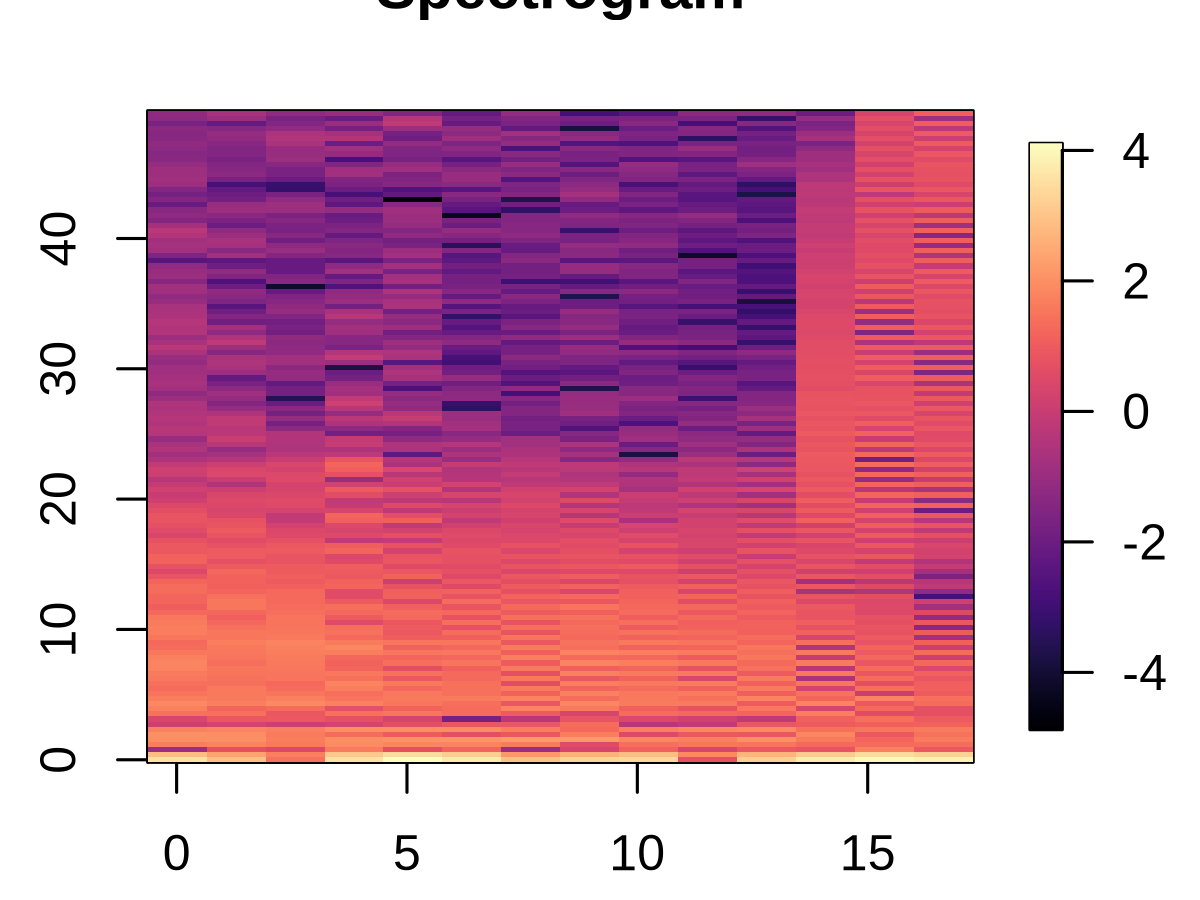

In [192]:
spec <- specgram(f, n = 256, Fs = fs, overlap = 128)
spectrogram <- log(abs(spec$S) + 1e-6)  
time_spec <- spec$t
freq_spec <- spec$f
# 세 번째 그래프: 스펙트로그램 플롯
image.plot(time_spec, freq_spec, t(spectrogram), 
           xlab = "Time (s)", ylab = "Frequency (Hz)", main = "Spectrogram",
           col = viridis(256, option = "magma"))

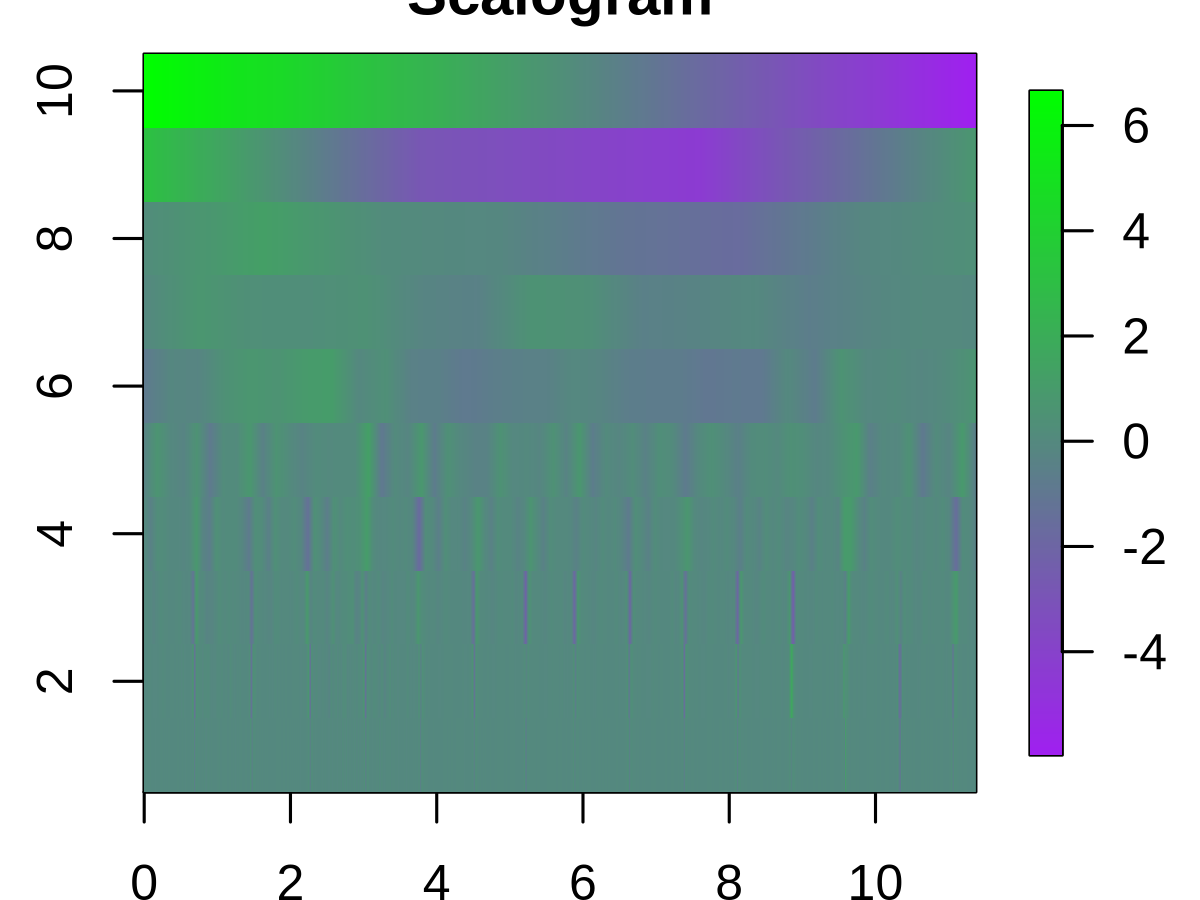

In [169]:
# 스칼로그램 계산 및 플롯
wt <- dwt(f, filter = "haar", n.levels = 10)
# 각 레벨의 웨이브릿 계수들을 동일한 길이로 맞추기
scalogram <- do.call(cbind, lapply(wt@W, function(w) approx(w, n = length(t))$y))
scales <- seq(1, ncol(scalogram))

# 네 번째 그래프: 스칼로그램 플롯
par(mar = c(4, 4, 2, 2))
image.plot(t, scales, scalogram, 
           xlab = "Time (s)", ylab = "Scale", main = "Scalogram",
           col = colorRampPalette(c("purple", "green"))(256))

# 그래프 배열을 원래 상태로 되돌리기
par(mfrow = c(1, 1))

## B.

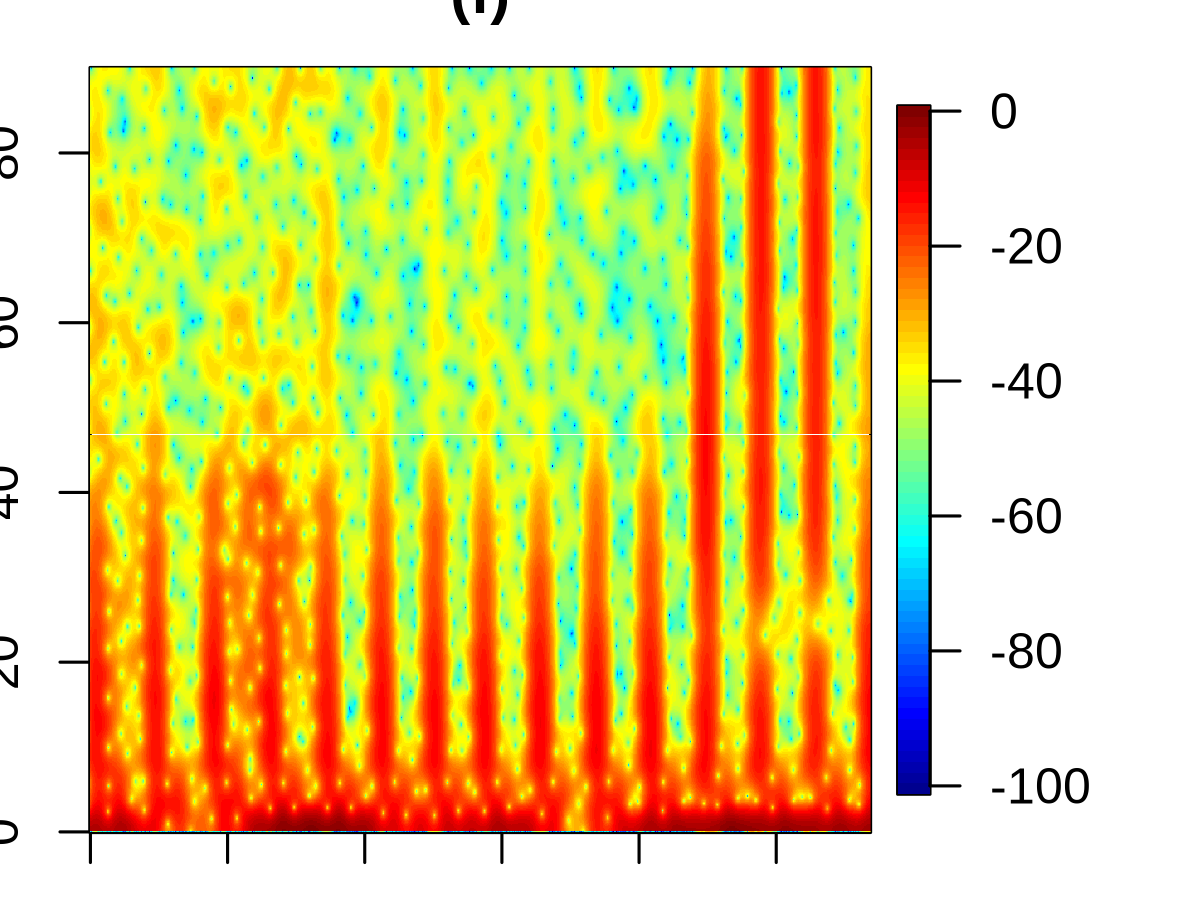

In [202]:
temp<-spectrogram(f,fs=180,windowlength = 612.5,show=F)$spectrogram
par(mar=c(2.5,2.5,2.5,1))
image.plot(x=seq(0,11.37,length=941),y=seq(0,90,length=617),z=temp[1:941,1:617],xlab="",ylab="",main="(f)",legend.mar=10)